# IE360 HOMEWORK 2
## Finding a correlation in different measurements


The aim of this research is to inquire if the tourism income of turkey has decreased, if it has; can it be related to exchange rates of Turkish lira. To answer this question I will be analyzing data of: Total number of visitors exited the country, average spending of a visitor(usd),  TRY/USD exchange rate

Warning message:
"Removed 6 rows containing missing values (geom_path)."

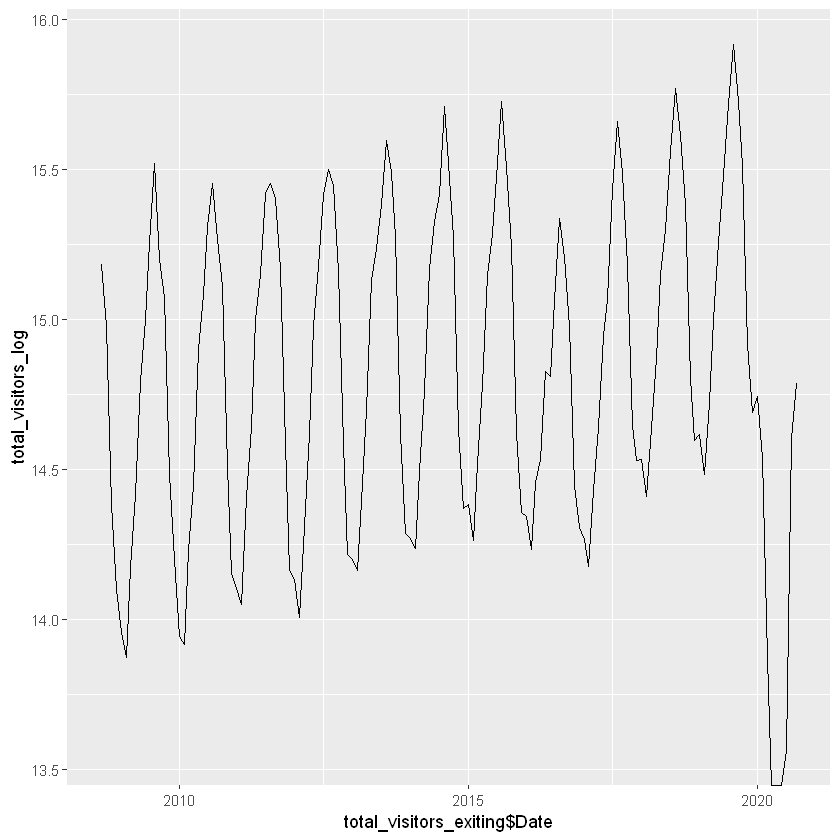

In [16]:
library(data.table,quietly = TRUE)
library(ggplot2,quietly = TRUE)
library(lubridate,quietly = TRUE)
library(zoo,quietly = TRUE)

data_path = 'C:/Users/omery/Desktop/total_visitors_exiting.csv'
total_visitors_exiting=fread(data_path,encoding='UTF-8')
setnames(total_visitors_exiting, names(total_visitors_exiting), c('Date', 'Visitors'))


total_visitors_exiting[,Date:=as.yearmon(Date,'%Y-%m')]
total_visitors_exiting[,Date:=as.Date(Date)]

total_visitors_exiting[,Visitors:=gsub('\\.','',Visitors)]
total_visitors_exiting[,Visitors:=gsub('\\,','.',Visitors)]
total_visitors_exiting[,Visitors:=as.numeric(Visitors)]

total_visitors_exiting$Visitors[is.na(total_visitors_exiting$Visitors)] <- 0

#ggplot(data=total_visitors_exiting, aes(x=Date, y=Visitors)) + geom_line()
total_visitors_log <- log(total_visitors_exiting$Visitors)
#plot(total_visitors_log)

ggplot(, aes(x=total_visitors_exiting$Date, y=total_visitors_log)) + geom_line()

Warning message:
"Removed 6 rows containing missing values (geom_path)."

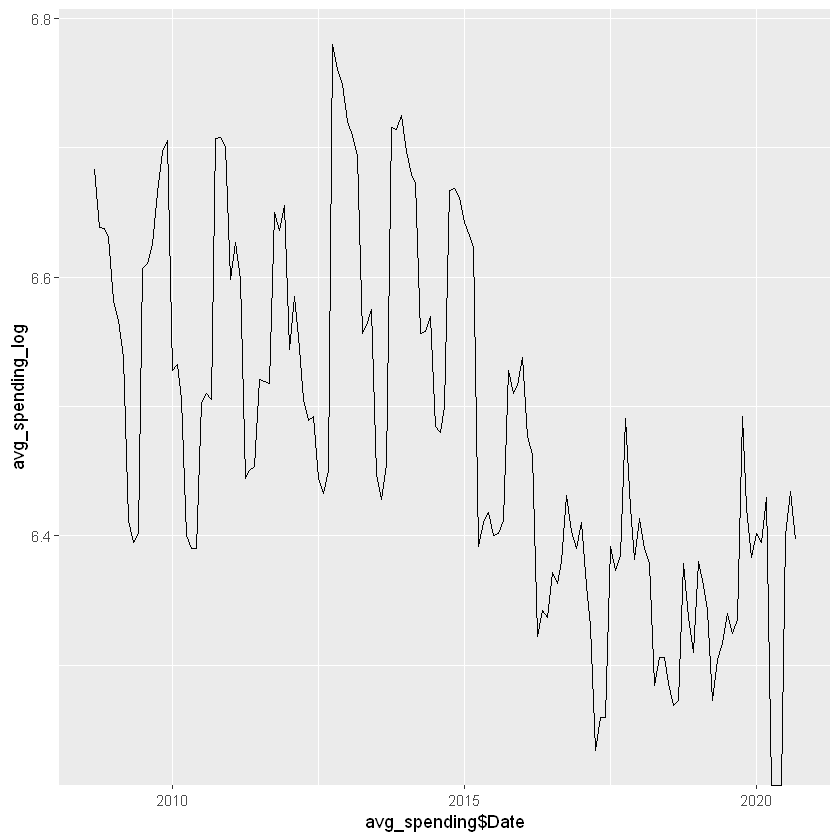

In [17]:
library(data.table,quietly = TRUE)
library(ggplot2,quietly = TRUE)
library(lubridate,quietly = TRUE)
library(zoo,quietly = TRUE)

data_path = 'C:/Users/omery/Desktop/avg_spending.csv'
avg_spending=fread(data_path,encoding='UTF-8')
setnames(avg_spending, names(avg_spending), c('Date', 'Spending'))

avg_spending[,Date:=as.yearmon(Date,'%Y-%m')]
avg_spending[,Date:=as.Date(Date)]

avg_spending[,Spending:=gsub('\\,','.',Spending)]
avg_spending[,Spending:=as.numeric(Spending)]

avg_spending$Spending[is.na(avg_spending$Spending)] <- 0

avg_spending_log <- log(avg_spending$Spending)

#ggplot(data=avg_spending, aes(x=Date, y=Spending)) + geom_line()

ggplot(, aes(x=avg_spending$Date, y=avg_spending_log)) + geom_line()

While we observed a more visibly clear trend in total visitors of the country, average spending of those visitors fluctuates more and also it decreases dramatically after 2015, we will see if is it related to the try/usd rate as this spending data is in usd. But first we will find the total spending by multiplying these to resources.

Warning message:
"Removed 6 rows containing missing values (geom_path)."

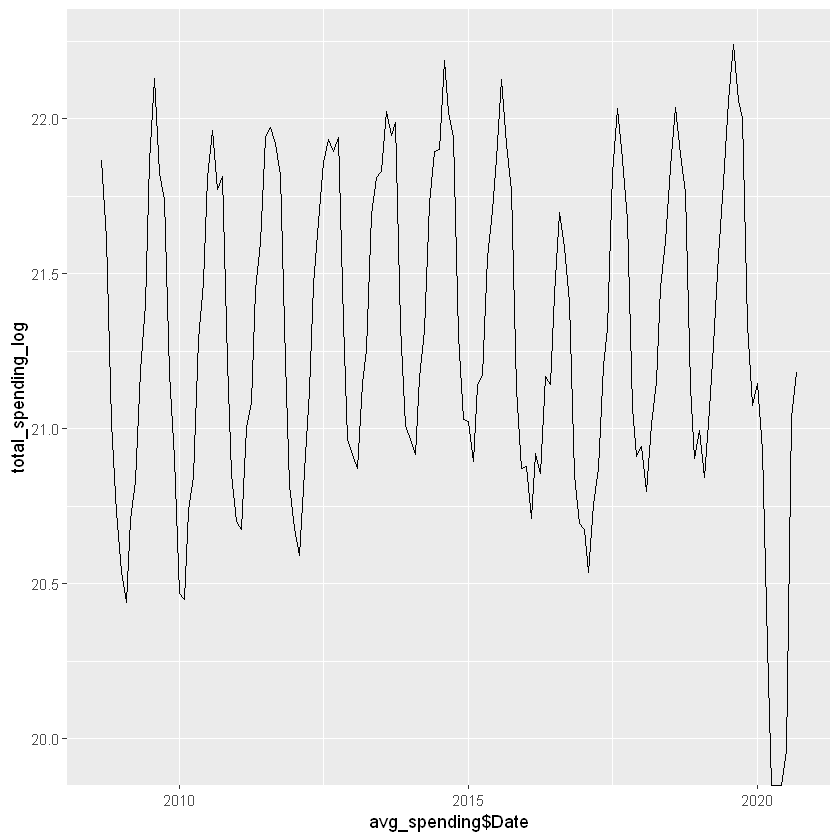

In [18]:
total_spending_vector <- avg_spending$Spending*total_visitors_exiting$Visitors
total_spending_log <- log(total_spending_vector)

ggplot(, aes(x=avg_spending$Date, y=total_spending_log)) + geom_line()

Now we have a steadier graph with a lower slope than the total visitors graph.

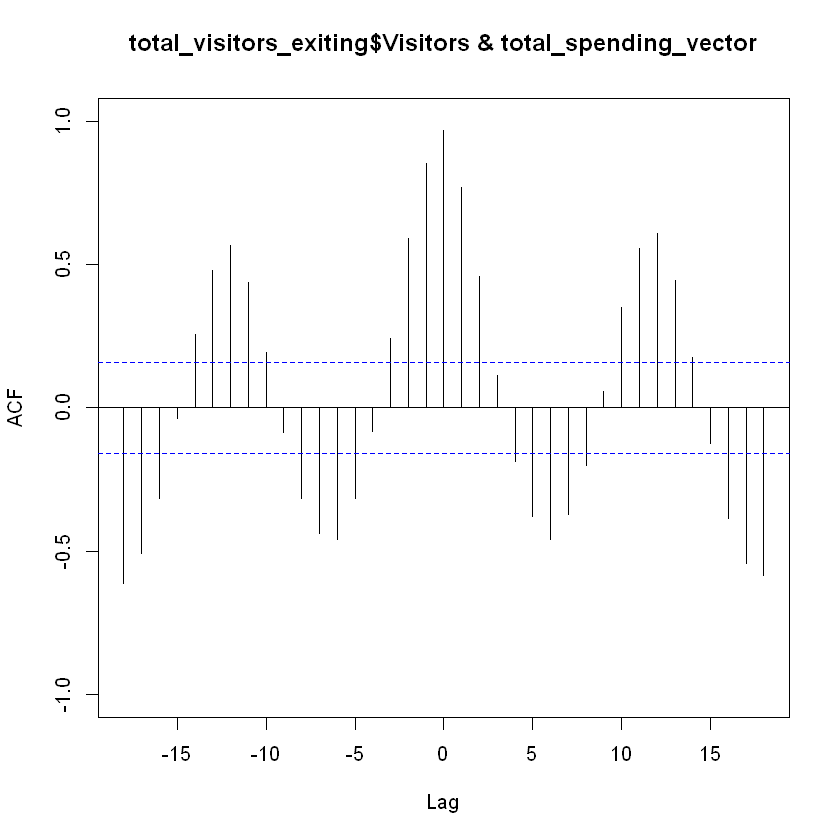

In [8]:
ccf(total_visitors_exiting$Visitors, total_spending_vector, ylim = range(-1,1))

We have shown that total spending is unsurprisingly strictly correlated with total visitors(almost 1 correlation at 0 lag). Now we will check if the decrease of average spending is related to the exchange rate or not.

Warning message:
"Removed 6 rows containing missing values (geom_path)."

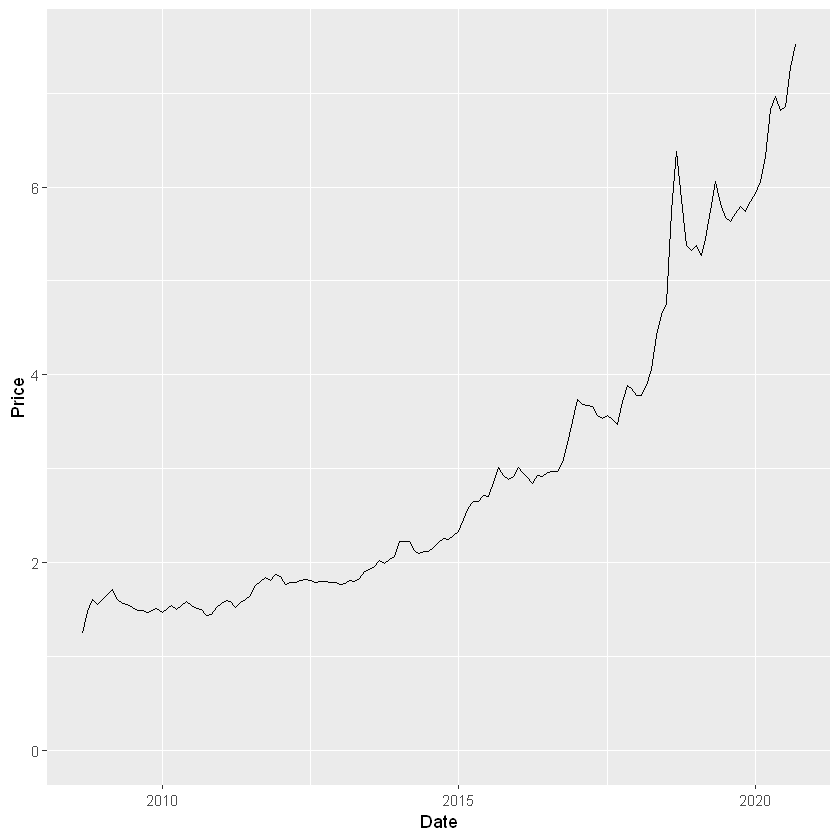

In [19]:
library(data.table,quietly = TRUE)
library(ggplot2,quietly = TRUE)
library(lubridate,quietly = TRUE)
library(zoo,quietly = TRUE)

data_path = 'C:/Users/omery/Desktop/try_usd.csv'
try_usd=fread(data_path,encoding='UTF-8')
setnames(try_usd, names(try_usd), c('Date', 'Price'))

try_usd[,Date:=as.yearmon(Date,'%Y-%m')]
try_usd[,Date:=as.Date(Date)]

try_usd[,Price:=gsub('\\,','.',Price)]
try_usd[,Price:=as.numeric(Price)]

try_usd$Price[is.na(try_usd$Price)] <- 0

ggplot(data=try_usd, aes(x=Date, y=Price)) + geom_line()

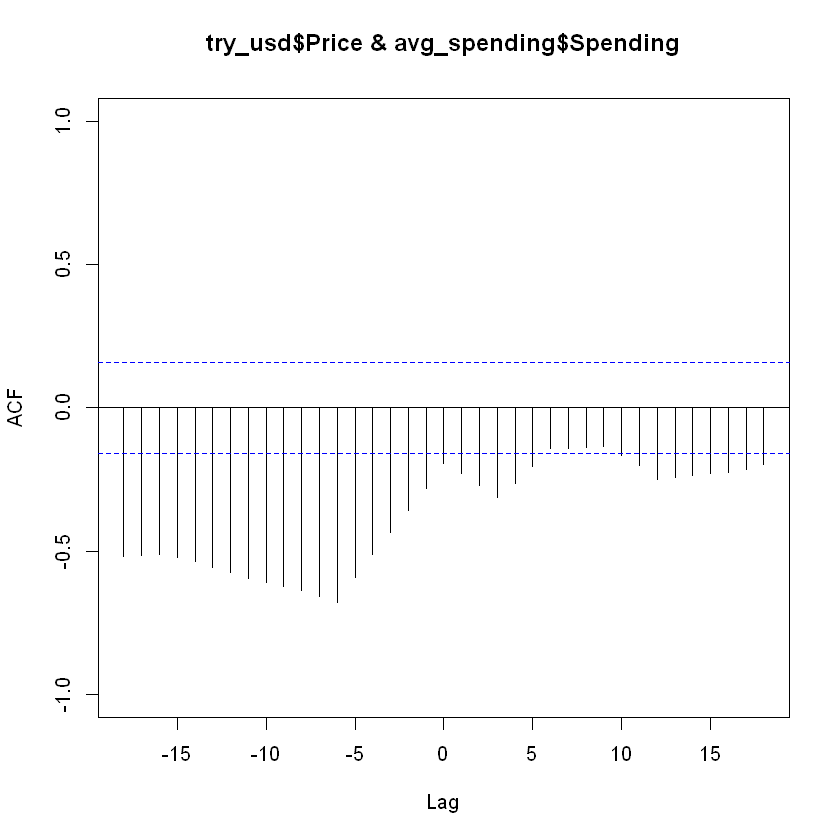

In [15]:
ccf(try_usd$Price, avg_spending$Spending, ylim = range(-1,1))

Negative correlation is visible as expected which means when the exchange rate increases(value of Turkish lira decreases) average spending of visitors (in usd) decreases.